# Step 1 - Importing our data
Importing the data we are going to use. In our case the data is placed in multiple .csv-files based on each individual city zip_code. We iterate over each city in the list and reads the corresponding .CSV file using pd.read_csv. The 'City' column of each DataFrame is assigned the integer value of the city code. The DataFrames are then appended to the dataframes list.

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import locale

cities = ['2800', '2820', '2830', '2840', '2850', '2900', '2920', '2930', '2942', '2950', '3000', '3460']
dataframes = []

for city in cities:
    filename = f'./data/house_data/house_data_{city}.csv'
    df = pd.read_csv(filename)
    df["City"] = int(city)
    dataframes.append(df)
data = pd.concat(dataframes, ignore_index=True)

data.head(5)

,Address,X,Y,Price,Type,Size,Squaremeter price,Energy class,Url,City
0,"Nørgaardsvej 27, 2. th",55.770647,12.508193,1595000,Ejerlejlighed,44,36250,E,https://www.dingeo.dk/adresse/2800-kongens%20l...,2800
1,Gammelmosevej 218,55.756103,12.480264,4495000,Rækkehus,113,39778,C,https://www.dingeo.dk/adresse/2800-kongens%20l...,2800
2,Danmarksvej 43A,55.794678,12.517936,7695000,Villa,182,42280,D,https://www.dingeo.dk/adresse/2800-kongens%20l...,2800
3,Stengårdsvænge 103,55.759154,12.482144,5295000,Rækkehus,102,51911,C,https://www.dingeo.dk/adresse/2800-kongens%20l...,2800
4,Buddingevej 110,55.758719,12.494712,8750000,Villa,188,46542,D,https://www.dingeo.dk/adresse/2800-kongens%20l...,2800


# Step 2 - Data processing
Any rows containing missing values are dropped using data.dropna(inplace=True)

In [2]:
data.dropna(inplace=True)

# Step 3 - Feauture Selection
Selecting the relevant features (variables) that we want to use for predicting the price. We exclude any columns that are not useful or not available during prediction.

In [3]:
features = ['X', 'Y', 'Size', 'Type', 'Energy class', 'City']
target = 'Price'

# Step 4  - Preprocess and Split the data
A dictionary called label_encoders is created to store the label encoders for categorical features. The code then iterates over each feature in features and checks if the feature's data type is 'object' (indicating a categorical feature - meaning non-numeric). If it is, a LabelEncoder is created for that feature, and the feature values in the data DataFrame are transformed using label_encoders[feature].fit_transform(data[feature]).

Spliting the data into training and testing sets to evaluate the performance of your machine learning model. The training set will be used to train the model, and the testing set will be used to evaluate its performance.

In [4]:
# Preprocess the data
label_encoders = {}
for feature in features:
    if data[feature].dtype == 'object':
        label_encoders[feature] = LabelEncoder()
        data[feature] = label_encoders[feature].fit_transform(data[feature])

print(label_encoders)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

{'Type': LabelEncoder(), 'Energy class': LabelEncoder()}


# Step 5 - Train a model
Choose a suitable machine learning algorithm for your task, such as linear regression, decision tree, or random forest. Train the model on the training data. 
The data DataFrame is split into training and testing sets using train_test_split. The training set (X_train, y_train) will be used to train the model, while the testing set (X_test, y_test) will be used for evaluation.

In [5]:
# Train the random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Saving the model for later use

In [6]:
#joblib.dump(model, 'RFG_Model')

# Step 6 - Evaluate the model
The code calculates the coefficient of determination (R2 score) between the predicted and actual prices using r2_score(y_test, y_pred). The R2 score indicates how well the model fits the data. The R2 score is a statistical measure that ranges from 0 to 1. A score of 0 means that the model fails to explain any of the variability in the target variable, while a score of 1 indicates that the model perfectly predicts the target variable.

Therefore, an R2 score of 0.730780767260184 suggests that the model is performing reasonably well in explaining and predicting house prices, capturing about 73.08% of the patterns and trends in the data. However, it also means that there is still a portion (approximately 26.92%) of the variability in house prices that is not captured by the model. This could be bettered by adding house features such as ground size,  number of floors, has basement?, near ocean?, near highway?, noise in the area etc...

In [7]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print(f"R2-score {r2}")

# mse = mean_squared_error(y_test, y_pred)
# rmse = mse**0.5
# print(f"Root Mean Squared Error (RMSE): {rmse}")

R2-score 0.8765924018281193


# Step 7 - Make predictions
The code iterates over each feature in the features list. For each feature, it checks if the data type of the corresponding value in the new_house DataFrame is 'object'. If it is, it means the feature is categorical (non-numeric value) and needs to be label encoded. The label encoder converts the categorical value into a numerical representation based on the encoding it learned during training.

After label encoding all the categorical features in the new_house DataFrame, we let the model make a prediction for the price of the new house using the model.predict() function. It passes the new_house DataFrame as the input to the model.

In [8]:
# Apply label encoding to the new house data 
new_house = pd.DataFrame([[56.034845, 12.591295, 68, 'Ejerlejlighed', 'D', 3000]], columns=features)
for feature in features:
    if new_house[feature].dtype == 'object':
        new_house[feature] = label_encoders[feature].transform(new_house[feature])
        
# Example prediction for a new house
predicted_price = model.predict(new_house)
locale.setlocale(locale.LC_ALL, 'da_DK.UTF-8')
formatted_price = locale.currency(predicted_price[0], grouping=True)
print(f"Predicted price for the house: {formatted_price}")

Predicted price for the house: kr 1.860.050,00


## Visualizations

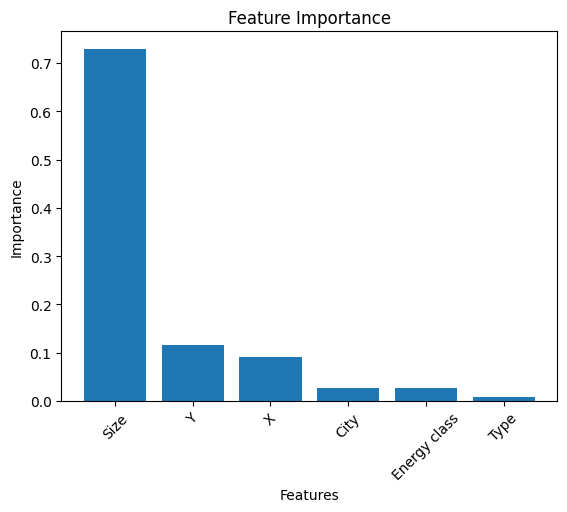

In [20]:
 # bar plot displaying importance of different features in the model. Showing the relative contribution of each feature in predicting the target variable.

import matplotlib.pyplot as plt
importances = model.feature_importances_
feature_names = data[features].columns

# Sort feature importances and corresponding feature names
importance_indices = importances.argsort()[::-1]
sorted_importances = importances[importance_indices]
sorted_feature_names = feature_names[importance_indices]

# Create the bar plot with sorted feature importances
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.show()


# Learning curve
shows the performance of a machine learning model on both the training set and the validation set as the size of the training set increases. It helps in assessing the model's performance, understanding its learning behavior, and determining if it is overfitting or underfitting.

The learning curve plot typically has the following components:

- The x-axis represents the number of training instances or the size of the training set.
- The y-axis represents the performance metric of interest, such as accuracy, mean squared error, or R-squared score.
- Two lines or curves are plotted: one for the training score and one for the cross-validation (or validation) score.

Here's how to understand a learning curve plot:
- Underfitting: When the training and validation scores are both relatively low, it suggests that the model is not capturing the underlying patterns in the data. This condition is known as underfitting. It indicates that the model is too simple or the training set is insufficient, and the model would benefit from more complex algorithms or additional training data.
- The ideal fit: As the size of the training set increases, the training and validation scores tend to converge and plateau at a reasonably high value. This indicates that the model is learning from the data and generalizing well to unseen examples. The smaller the gap between the training and validation scores, the better the model's generalization.

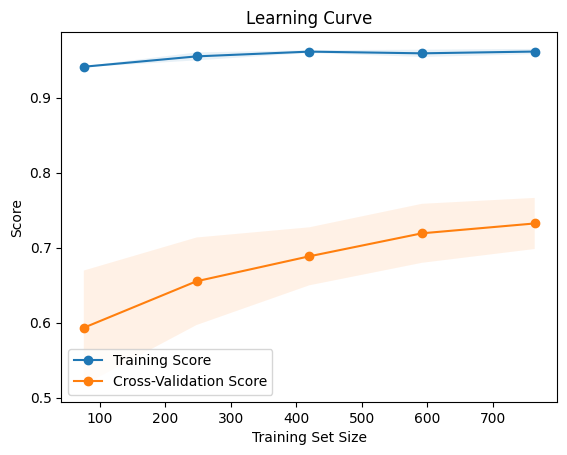

In [23]:
from sklearn.model_selection import learning_curve
import numpy as np

# Calculate the learning curve scores
train_sizes, train_scores, val_scores = learning_curve(model, X_train, y_train, cv=5)

# Calculate the mean and standard deviation of the scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', label='Training Score')
plt.plot(train_sizes, val_scores_mean, 'o-', label='Cross-Validation Score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1)
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()
